In [2]:
import numpy as np
from sklearn.datasets import make_checkerboard
from matplotlib import pyplot as plt

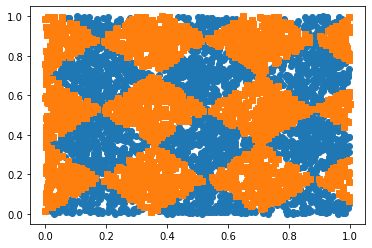

<Figure size 432x288 with 0 Axes>

In [60]:
def gen_cb(N, a, alpha): 
    """
    N: number of points on the checkerboard
    a: width of the checker board (0<a<1)
    alpha: rotation of the checkerboard in radians 
    """
    d = np.random.rand(N, 2).T
    d_transformed = np.array([d[0]*np.cos(alpha)-d[1]*np.sin(alpha), 
                              d[0]*np.sin(alpha)+d[1]*np.cos(alpha)]).T
    s = np.ceil(d_transformed[:,0]/a)+np.floor(d_transformed[:,1]/a)
    lab = 2 - (s%2)
    data = d.T
    return data, lab 


X, y = gen_cb(5000, .25, 3.14159/4)
y -= 1
plt.figure()
plt.plot(X[np.where(y==0)[0], 0], X[np.where(y==0)[0], 1], 'o')
plt.plot(X[np.where(y==1)[0], 0], X[np.where(y==1)[0], 1], 's')
plt.show()
plt.clf()

In [61]:
prior = np.array([(y == 0).sum() / np.size(y), (y == 1).sum() / np.size(y)])
prior

array([0.5076, 0.4924])

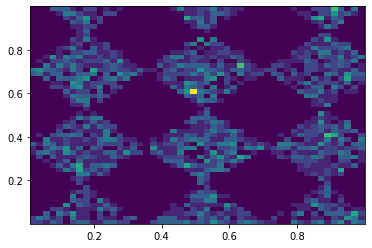

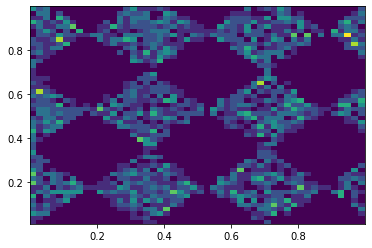

In [62]:
like = [0, 0]
like[0], x0, y0, fig0 = plt.hist2d(X[np.where(y==0)[0], 0], X[np.where(y==0)[0], 1], bins=50)
plt.show()
like[1], x1, y1, fig1 = plt.hist2d(X[np.where(y==1)[0], 0], X[np.where(y==1)[0], 1], bins=50)
plt.show()

In [63]:
evid = like[0] * prior[0] + like[1] * prior[1]

In [64]:
post = np.zeros((2, 50, 50))
post[0] = like[0] * prior[0] / evid
post[1] = like[1] * prior[1] / evid

/home/rafa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/rafa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
post.shape

(2, 50, 50)

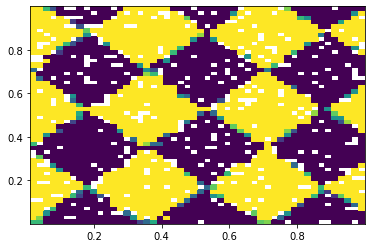

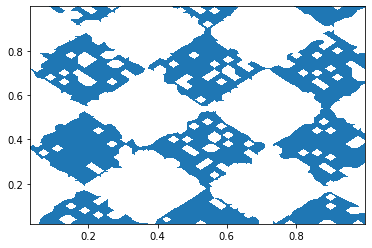

In [66]:
plt.pcolormesh(x0, y0, post[0])
plt.show()
plt.contourf(x0[1:], y0[1:], post[0], levels=1, colors=["tab:blue", "white"])

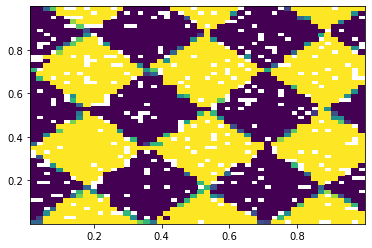

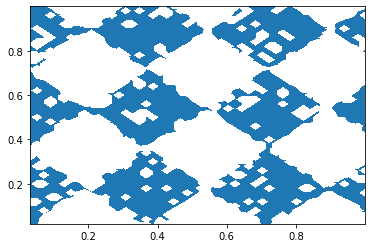

In [70]:
plt.pcolormesh(x0, y0, post[1])
plt.show()
plt.contourf(x0[1:], y0[1:], post[1], levels=1, colors=["tab:blue", "white"])